# Practice on Data Analysis 
## Using public data on covid-19


For my analysis I used the 'owid-covid-data.csv' file. The data is available __[here](https://ourworldindata.org/coronavirus-data)__, under this __[license](https://creativecommons.org/licenses/by/4.0/legalcode)__.


-  **Ask** myself what were my goals for this analysis:
    -  Analyse a 1 year period of covid-19 in Portugal
    -  Check notable events (covid related) that happened during that year
    -  Check vaccinacion/deaths/cases/hospitalizations numbers during that year
    -  See vaccination numbers on European countries with +10 million population
    -  See vaccination start dates for those same European countries
    

-  **Prepare and Process** 
    -  Select what data served my purposes
    -  A lot of NaN values to deal with
    
 
-  **Analyse** 
    -  Identify patterns
    -  Draw conclusions
    
    
-  **Share** 
    -  Create effective visuals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt              # First plot
import matplotlib.dates as mdates  # First plot

In [2]:
# pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
all_data = pd.read_csv(r'owid-covid-data.csv')
all_data_copy = all_data.copy()

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138727 entries, 0 to 138726
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    138727 non-null  object 
 1   continent                                   129902 non-null  object 
 2   location                                    138727 non-null  object 
 3   date                                        138727 non-null  object 
 4   total_cases                                 130999 non-null  float64
 5   new_cases                                   130994 non-null  float64
 6   new_cases_smoothed                          129954 non-null  float64
 7   total_deaths                                119666 non-null  float64
 8   new_deaths                                  119862 non-null  float64
 9   new_deaths_smoothed                         129954 non-null  float64
 

In [5]:
filt_data = all_data[['continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 
                    'new_deaths', 'new_deaths_smoothed', 'icu_patients', 'hosp_patients', 'new_tests', 'total_tests',
                    'population', 'hospital_beds_per_thousand', 'people_vaccinated', 'people_fully_vaccinated']]
filt_data_cp = filt_data.copy()
filt_data

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,total_tests,population,hospital_beds_per_thousand,people_vaccinated,people_fully_vaccinated
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,0.5,NaN,NaN
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,0.5,NaN,NaN
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,0.5,NaN,NaN
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,0.5,NaN,NaN
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,0.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138722,Africa,Zimbabwe,2021-12-04,138523.0,1082.0,669.571,4709.0,1.0,0.714,NaN,NaN,7099.0,1485499.0,15092171.0,1.7,3866139.0,2876054.0
138723,Africa,Zimbabwe,2021-12-05,139046.0,523.0,727.857,4710.0,1.0,0.714,NaN,NaN,NaN,NaN,15092171.0,1.7,3875546.0,2884043.0
138724,Africa,Zimbabwe,2021-12-06,139046.0,0.0,688.571,4710.0,0.0,0.571,NaN,NaN,NaN,NaN,15092171.0,1.7,3883107.0,2892364.0
138725,Africa,Zimbabwe,2021-12-07,141601.0,2555.0,996.571,4713.0,3.0,0.857,NaN,NaN,NaN,NaN,15092171.0,1.7,3897441.0,2910951.0


In [6]:
pt_data = filt_data[(filt_data.continent == 'Europe') & (filt_data.location == 'Portugal')]
pt_data_copy = pt_data.copy()
pt_data.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,total_tests,population,hospital_beds_per_thousand,people_vaccinated,people_fully_vaccinated
100870,Europe,Portugal,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10167923.0,3.39,NaN,NaN
100871,Europe,Portugal,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10167923.0,3.39,NaN,NaN
100872,Europe,Portugal,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10167923.0,3.39,NaN,NaN
100873,Europe,Portugal,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10167923.0,3.39,NaN,NaN
100874,Europe,Portugal,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10167923.0,3.39,NaN,NaN


In [7]:
pt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 100870 to 101528
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   continent                   659 non-null    object 
 1   location                    659 non-null    object 
 2   date                        659 non-null    object 
 3   total_cases                 647 non-null    float64
 4   new_cases                   647 non-null    float64
 5   new_cases_smoothed          642 non-null    float64
 6   total_deaths                632 non-null    float64
 7   new_deaths                  632 non-null    float64
 8   new_deaths_smoothed         642 non-null    float64
 9   icu_patients                642 non-null    float64
 10  hosp_patients               642 non-null    float64
 11  new_tests                   645 non-null    float64
 12  total_tests                 646 non-null    float64
 13  population                 

In [8]:
# Check NaN values in all columns
pt_data.isna().sum()

continent                       0
location                        0
date                            0
total_cases                    12
new_cases                      12
new_cases_smoothed             17
total_deaths                   27
new_deaths                     27
new_deaths_smoothed            17
icu_patients                   17
hosp_patients                  17
new_tests                      14
total_tests                    13
population                      0
hospital_beds_per_thousand      0
people_vaccinated             394
people_fully_vaccinated       409
dtype: int64

In [9]:
# Convert 'date' column to type date and create 2 new columns for year and month
pd.to_datetime(pt_data.date, format='%Y-%m-%d')

100870   2020-01-06
100871   2020-01-18
100872   2020-01-24
100873   2020-02-02
100874   2020-02-09
            ...    
101524   2021-12-04
101525   2021-12-05
101526   2021-12-06
101527   2021-12-07
101528   2021-12-08
Name: date, Length: 659, dtype: datetime64[ns]

In [10]:
# Check the range (date wise) of my dataset
pt_data['date'].unique()
# Goes from 2020-01-06 to 2021-12-08

array(['2020-01-06', '2020-01-18', '2020-01-24', '2020-02-02',
       '2020-02-09', '2020-02-15', '2020-02-23', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
       '2020-04-19', '2020-04-20', '2020-04-21', '2020-

In [11]:
# Drop the rows before 2020-03-01 since thats when the information starts to be daily
pt_data = pt_data[~(pt_data['date'] < '2020-03-01')]

# Drop the following columns as I will use the 'smoothed' ones
pt_data.drop(columns=['total_cases', 'new_cases', 'total_deaths', 'new_deaths'], inplace=True)
pt_data

,continent,location,date,new_cases_smoothed,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,total_tests,population,hospital_beds_per_thousand,people_vaccinated,people_fully_vaccinated
100881,Europe,Portugal,2020-03-01,NaN,NaN,0.0,0.0,NaN,25.0,10167923.0,3.39,NaN,NaN
100882,Europe,Portugal,2020-03-02,NaN,NaN,0.0,0.0,45.0,70.0,10167923.0,3.39,NaN,NaN
100883,Europe,Portugal,2020-03-03,NaN,NaN,0.0,0.0,61.0,131.0,10167923.0,3.39,NaN,NaN
100884,Europe,Portugal,2020-03-04,NaN,NaN,0.0,0.0,40.0,171.0,10167923.0,3.39,NaN,NaN
100885,Europe,Portugal,2020-03-05,NaN,NaN,0.0,9.0,80.0,251.0,10167923.0,3.39,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101524,Europe,Portugal,2021-12-04,3313.000,15.571,NaN,NaN,109879.0,21858506.0,10167923.0,3.39,9058320.0,9001340.0
101525,Europe,Portugal,2021-12-05,3440.000,17.143,NaN,NaN,58253.0,21916759.0,10167923.0,3.39,9062069.0,9005089.0
101526,Europe,Portugal,2021-12-06,3523.000,17.286,NaN,NaN,126228.0,22042987.0,10167923.0,3.39,9064280.0,9007300.0
101527,Europe,Portugal,2021-12-07,3595.857,18.714,NaN,NaN,NaN,NaN,10167923.0,3.39,9068348.0,9011368.0


In [12]:
# Count NA values in both 'new_cases_smoothed' and 'new_deaths_smoothed' columns
print(pt_data['new_cases_smoothed'].isna().sum())
print(pt_data['new_deaths_smoothed'].isna().sum())

# The result, for both, is 6.
# This represents the first 6 days of March 2020. 

# I will replace these particular 12 values with 0.
pt_data['new_cases_smoothed'] = pt_data['new_cases_smoothed'].fillna(0)
pt_data['new_deaths_smoothed'] = pt_data['new_deaths_smoothed'].fillna(0)

print('After the replacement is complete:')

print(pt_data['new_cases_smoothed'].isna().sum())
print(pt_data['new_deaths_smoothed'].isna().sum())

6
6
After the replacement is complete:
0
0


In [13]:
# Count NaN values in both 'icu_patients' and ' hosp_patients' columns
# Find out where they are in the timeline and decide whether to drop thoose rows or replace the values with bfill or ffill
data = [pt_data[['icu_patients', 'hosp_patients']]]

hosp_df = pd.concat(data, axis=1)
hosp_df.set_index(pt_data['date'], inplace=True)

print(hosp_df.loc[hosp_df['icu_patients'].isna()])
print(hosp_df.loc[hosp_df['hosp_patients'].isna()])

# Both the above columns only have missing values from 2021-11-29 to 2021-12-08 .
# I decided to drop these rows from the pt_data Dataframe.
pt_data = pt_data[~(pt_data['date'] >= '2021-11-28 ')]

# Check the tail of the DataFrame to confirm the changes
pt_data.tail()

            icu_patients  hosp_patients
date                                   
2021-11-29           NaN            NaN
2021-11-30           NaN            NaN
2021-12-01           NaN            NaN
2021-12-02           NaN            NaN
2021-12-03           NaN            NaN
2021-12-04           NaN            NaN
2021-12-05           NaN            NaN
2021-12-06           NaN            NaN
2021-12-07           NaN            NaN
2021-12-08           NaN            NaN
            icu_patients  hosp_patients
date                                   
2021-11-29           NaN            NaN
2021-11-30           NaN            NaN
2021-12-01           NaN            NaN
2021-12-02           NaN            NaN
2021-12-03           NaN            NaN
2021-12-04           NaN            NaN
2021-12-05           NaN            NaN
2021-12-06           NaN            NaN
2021-12-07           NaN            NaN
2021-12-08           NaN            NaN


,continent,location,date,new_cases_smoothed,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,total_tests,population,hospital_beds_per_thousand,people_vaccinated,people_fully_vaccinated
101514,Europe,Portugal,2021-11-24,2487.000,12.429,105.0,681.0,71124.0,20915616.0,10167923.0,3.39,NaN,NaN
101515,Europe,Portugal,2021-11-25,2594.429,12.857,103.0,691.0,79736.0,20995352.0,10167923.0,3.39,NaN,NaN
101516,Europe,Portugal,2021-11-26,2713.571,13.286,100.0,705.0,98094.0,21093446.0,10167923.0,3.39,NaN,NaN
101517,Europe,Portugal,2021-11-27,2860.857,13.571,104.0,708.0,72399.0,21165845.0,10167923.0,3.39,NaN,NaN
101518,Europe,Portugal,2021-11-28,2917.714,13.714,104.0,764.0,39132.0,21204977.0,10167923.0,3.39,NaN,NaN


<AxesSubplot:xlabel='date'>

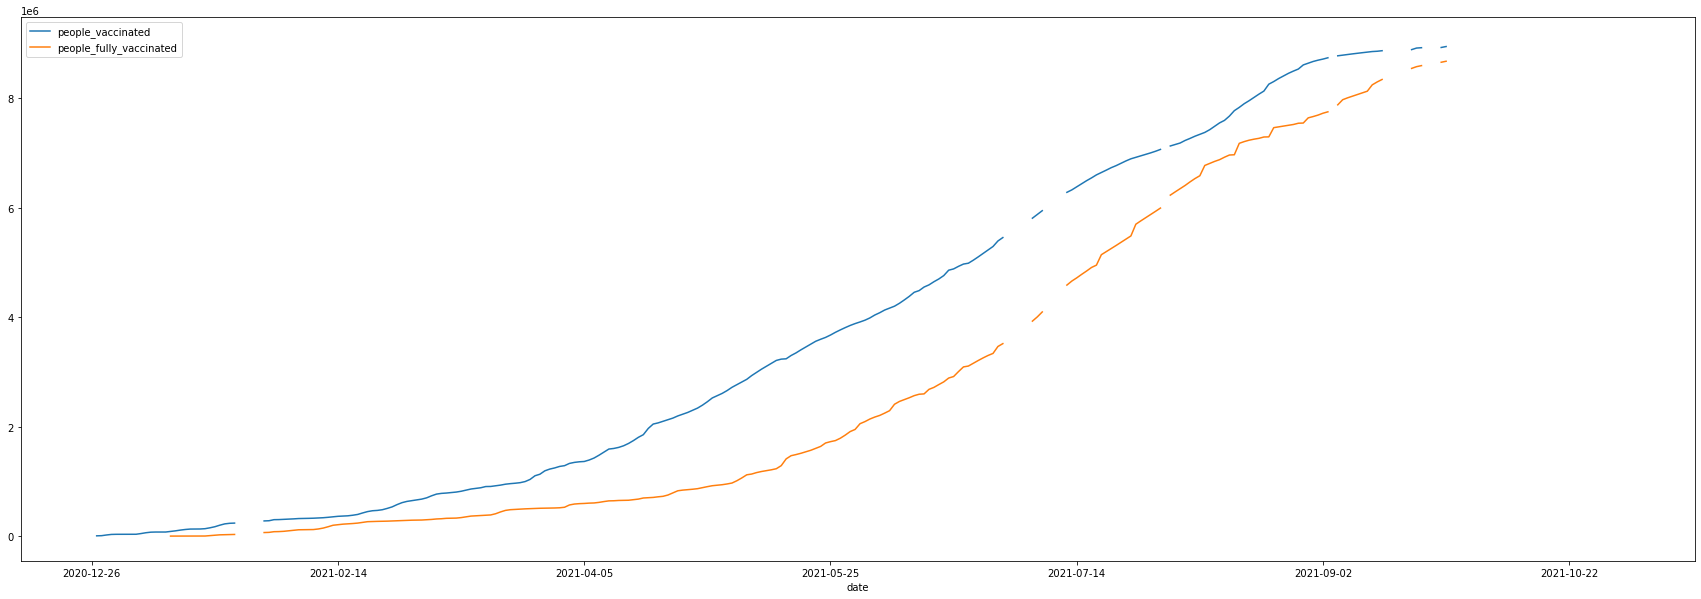

In [14]:
# Operate the same way as above but for the 'people_vaccinated' and 'people_fully_vaccinated' columns.
data = [pt_data[['people_vaccinated', 'people_fully_vaccinated']]]

vac_df = pd.concat(data, axis=1)
vac_df.set_index(pt_data['date'], inplace=True)

# Visualize where the NaN values, for these 2 columns, are present in order to make a decision on how to act.
vac_df.plot(figsize=(30,10))
# Looking at the plot I can estimate the dates where values are missing

In [15]:
# Lets look at the vac_df on the dates I presume are NaN values, by looking at the plot

print('Before\n')
print(vac_df.loc['2021-01-20': '2021-02-04']) 

print('\n')
# Lets replace them with ffill
vac_df.loc['2021-01-23': '2021-01-31'].fillna(method='ffill', inplace=True)

print('After\n')
print(vac_df.loc['2021-01-20': '2021-02-04'])

Before

            people_vaccinated  people_fully_vaccinated
date                                                  
2021-01-20           171192.0                  18207.0
2021-01-21           199322.0                  23181.0
2021-01-22           223177.0                  25585.0
2021-01-23           233931.0                  29625.0
2021-01-24           237589.0                  30142.0
2021-01-25                NaN                      NaN
2021-01-26                NaN                      NaN
2021-01-27                NaN                      NaN
2021-01-28                NaN                      NaN
2021-01-29                NaN                      NaN
2021-01-30           277215.0                  65050.0
2021-01-31           280829.0                  67974.0
2021-02-01           300196.0                  80488.0
2021-02-02           301806.0                  82431.0
2021-02-03           305475.0                  87588.0
2021-02-04           309618.0                  96711.0




C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [16]:
print('Before\n')
print(vac_df.loc['2021-06-25': '2021-07-15']) 

print('\n')
# Lets replace them with ffill
vac_df.loc['2021-06-28': '2021-07-06'].fillna(method='ffill', inplace=True)
vac_df.loc['2021-07-07': '2021-07-13'].fillna(method='ffill', inplace=True)

print('After\n')
print(vac_df.loc['2021-06-25': '2021-07-15'])

Before

            people_vaccinated  people_fully_vaccinated
date                                                  
2021-06-25          5165727.0                3256899.0
2021-06-26          5231065.0                3301188.0
2021-06-27          5292088.0                3338249.0
2021-06-28          5393134.0                3465091.0
2021-06-29          5455604.0                3517308.0
2021-06-30                NaN                      NaN
2021-07-01                NaN                      NaN
2021-07-02                NaN                      NaN
2021-07-03                NaN                      NaN
2021-07-04                NaN                      NaN
2021-07-05          5809445.0                3928199.0
2021-07-06          5877895.0                4006117.0
2021-07-07          5946422.0                4096293.0
2021-07-08                NaN                      NaN
2021-07-09                NaN                      NaN
2021-07-10                NaN                      NaN
20

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
print('Before\n')
print(vac_df.loc['2021-07-28': '2021-08-05']) 

print('\n')
# Lets replace them with ffill
vac_df.loc['2021-07-30': '2021-08-03'].fillna(method='ffill', inplace=True)

print('After\n')
print(vac_df.loc['2021-07-28': '2021-08-05'])

Before

            people_vaccinated  people_fully_vaccinated
date                                                  
2021-07-28          6974732.0                5817596.0
2021-07-29          7002806.0                5876834.0
2021-07-30          7032521.0                5934918.0
2021-07-31          7066297.0                5994565.0
2021-08-01                NaN                      NaN
2021-08-02          7129039.0                6230708.0
2021-08-03          7155328.0                6290675.0
2021-08-04          7183322.0                6347852.0
2021-08-05          7229707.0                6407389.0


After

            people_vaccinated  people_fully_vaccinated
date                                                  
2021-07-28          6974732.0                5817596.0
2021-07-29          7002806.0                5876834.0
2021-07-30          7032521.0                5934918.0
2021-07-31          7066297.0                5994565.0
2021-08-01          7066297.0                599

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [18]:
print('Before\n')
print(vac_df.loc['2021-09': '2021-09-10']) 

print('\n')
# Lets replace them with ffill
vac_df.loc['2021-09-01': '2021-09-06'].fillna(method='ffill', inplace=True)

print('After\n')
print(vac_df.loc['2021-09': '2021-09-10'])

Before

            people_vaccinated  people_fully_vaccinated
date                                                  
2021-09-01          8696989.0                7693635.0
2021-09-02          8717008.0                7727730.0
2021-09-03          8740934.0                7753354.0
2021-09-04                NaN                      NaN
2021-09-05          8776856.0                7880870.0
2021-09-06          8788896.0                7974325.0
2021-09-07          8800949.0                8009092.0
2021-09-08          8812098.0                8039551.0
2021-09-09          8822003.0                8070472.0
2021-09-10          8833779.0                8100277.0


After

            people_vaccinated  people_fully_vaccinated
date                                                  
2021-09-01          8696989.0                7693635.0
2021-09-02          8717008.0                7727730.0
2021-09-03          8740934.0                7753354.0
2021-09-04          8740934.0                775

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [19]:
print('Before\n')
print(vac_df.loc['2021-09-10': '2021-10-10']) 

print('\n')
# Lets replace them with ffill
vac_df.loc['2021-09-13': '2021-09-21'].fillna(method='ffill', inplace=True)
vac_df.loc['2021-09-22': '2021-09-26'].fillna(method='ffill', inplace=True)
vac_df.loc['2021-09-27': '2021-10-04'].fillna(method='ffill', inplace=True)

print('After\n')
print(vac_df.loc['2021-09-10': '2021-10-10'])

Before

            people_vaccinated  people_fully_vaccinated
date                                                  
2021-09-10          8833779.0                8100277.0
2021-09-11          8844781.0                8130139.0
2021-09-12          8854604.0                8245998.0
2021-09-13          8859979.0                8298891.0
2021-09-14          8869820.0                8344491.0
2021-09-15                NaN                      NaN
2021-09-16                NaN                      NaN
2021-09-17                NaN                      NaN
2021-09-18                NaN                      NaN
2021-09-19                NaN                      NaN
2021-09-20          8889941.0                8546688.0
2021-09-21          8918541.0                8578497.0
2021-09-22          8924775.0                8597410.0
2021-09-23                NaN                      NaN
2021-09-24                NaN                      NaN
2021-09-25                NaN                      NaN
20

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [20]:
print('Before\n')
print(vac_df.loc['2021-10-04': '2021-11-05']) 

print('\n')
# Lets replace them with ffill
vac_df.loc['2021-10-04': '2021-10-11'].fillna(method='ffill', inplace=True)
vac_df.loc['2021-10-11': '2021-10-18'].fillna(method='ffill', inplace=True)
vac_df.loc['2021-10-18': '2021-10-25'].fillna(method='ffill', inplace=True)
vac_df.loc['2021-10-25': '2021-11-01'].fillna(method='ffill', inplace=True)

print('After\n')
print(vac_df.loc['2021-10-04': '2021-11-05'])

Before

            people_vaccinated  people_fully_vaccinated
date                                                  
2021-10-04          8970579.0                8743133.0
2021-10-05                NaN                      NaN
2021-10-06                NaN                      NaN
2021-10-07                NaN                      NaN
2021-10-08                NaN                      NaN
2021-10-09                NaN                      NaN
2021-10-10                NaN                      NaN
2021-10-11          8986023.0                8790851.0
2021-10-12                NaN                      NaN
2021-10-13                NaN                      NaN
2021-10-14                NaN                      NaN
2021-10-15                NaN                      NaN
2021-10-16                NaN                      NaN
2021-10-17                NaN                      NaN
2021-10-18          9003852.0                8832113.0
2021-10-19                NaN                      NaN
20

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [21]:
print('Before\n')
print(vac_df.loc['2021-11-01': '2021-12']) 

print('\n')
# Lets replace them with ffill
vac_df.loc['2021-11-01': '2021-11-28'].fillna(method='ffill', inplace=True)

print('After\n')
print(vac_df.loc['2021-11-01 ': '2021-12'])

Before

            people_vaccinated  people_fully_vaccinated
date                                                  
2021-11-01          9030756.0                8887758.0
2021-11-02                NaN                      NaN
2021-11-03                NaN                      NaN
2021-11-04                NaN                      NaN
2021-11-05                NaN                      NaN
2021-11-06                NaN                      NaN
2021-11-07                NaN                      NaN
2021-11-08                NaN                      NaN
2021-11-09                NaN                      NaN
2021-11-10                NaN                      NaN
2021-11-11                NaN                      NaN
2021-11-12                NaN                      NaN
2021-11-13                NaN                      NaN
2021-11-14                NaN                      NaN
2021-11-15                NaN                      NaN
2021-11-16                NaN                      NaN
20

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<AxesSubplot:xlabel='date'>

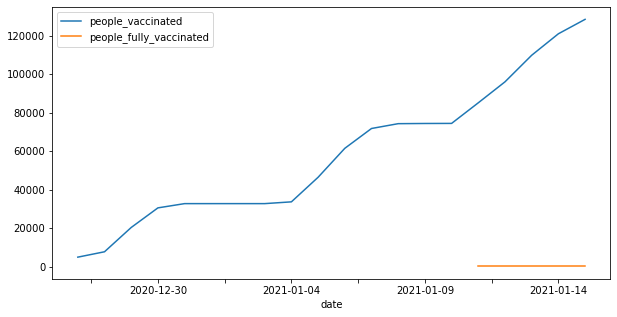

In [22]:
# In this visualization I can confirm that people_vaccinated has no values before 2020-12-27
# and people_fully_vaccinated has no values before 2021-01-11
vac_df['2020-12-20' :'2021-01-15'].plot(figsize=(10,5))

False




<AxesSubplot:xlabel='date'>

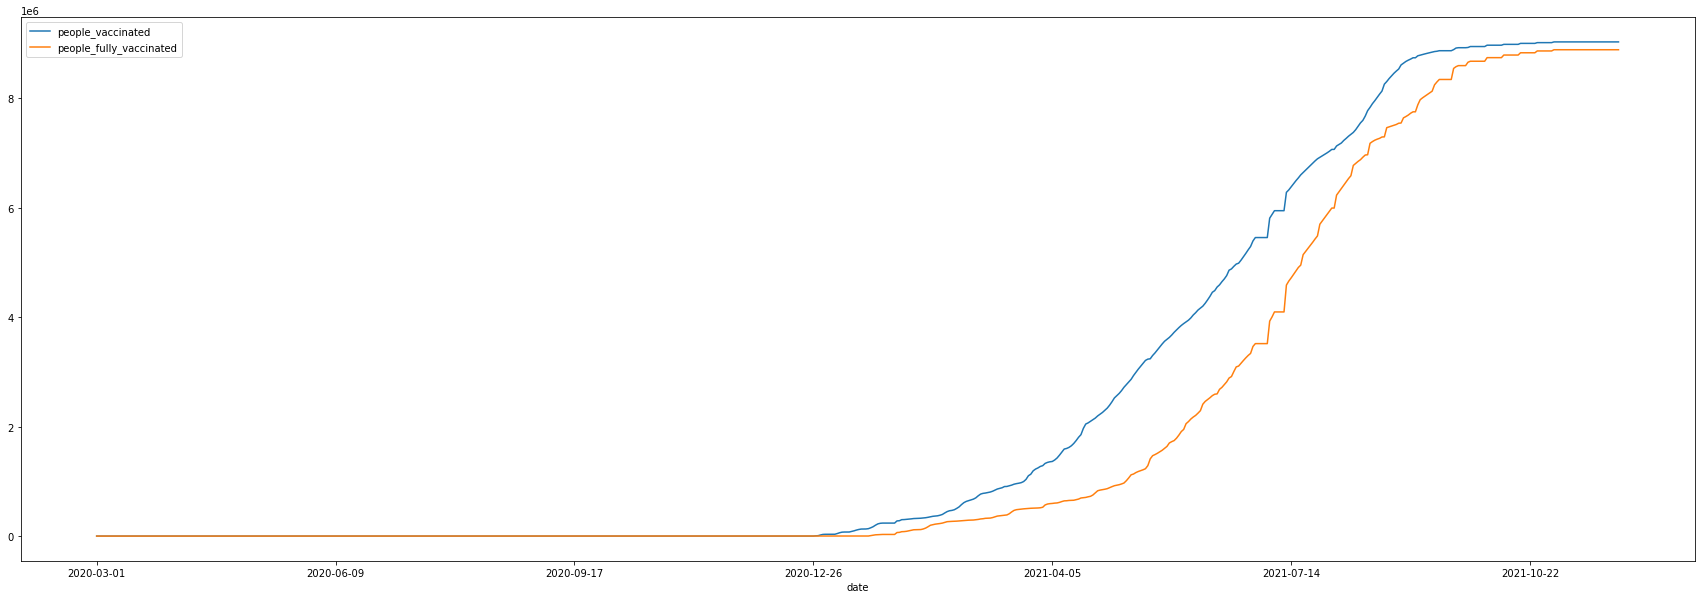

In [23]:
# I will replace the remaining NaN values in both people_vaccinated and people_fully_vaccinated with 0.
vac_df['people_vaccinated'] = vac_df['people_vaccinated'].fillna(0)
vac_df['people_fully_vaccinated'] = vac_df['people_fully_vaccinated'].fillna(0)

print(vac_df.isnull().values.any())
print('\n')
vac_df.plot(figsize=(30,10))

In [24]:
# Replacing the old 'people_vaccinated' and 'people_fully_vaccinated' columns with the new ones from the vac_df DataFrame
# Using this method, since the length of the elements is the same
pt_data.people_vaccinated = vac_df['people_vaccinated'].values
pt_data.people_fully_vaccinated = vac_df['people_fully_vaccinated'].values

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
# Check if there any NA values left and in what columns they might be.
print('BEFORE', pt_data.isna().sum())

# There is one NA value in the 'new_tests' column. Its the first row in the Dataframe so, in this case,
# I will replace it with 0 since its the first value.
pt_data['new_tests'].fillna(0, inplace=True)

# Confirm there are no NaN values left in the entire DataFrame
# If false, there arent.
print('\n', pt_data.isnull().values.any())
pt_data.head()

BEFORE continent                     0
location                      0
date                          0
new_cases_smoothed            0
new_deaths_smoothed           0
icu_patients                  0
hosp_patients                 0
new_tests                     1
total_tests                   0
population                    0
hospital_beds_per_thousand    0
people_vaccinated             0
people_fully_vaccinated       0
dtype: int64

 False


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,continent,location,date,new_cases_smoothed,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,total_tests,population,hospital_beds_per_thousand,people_vaccinated,people_fully_vaccinated
100881,Europe,Portugal,2020-03-01,0.0,0.0,0.0,0.0,0.0,25.0,10167923.0,3.39,0.0,0.0
100882,Europe,Portugal,2020-03-02,0.0,0.0,0.0,0.0,45.0,70.0,10167923.0,3.39,0.0,0.0
100883,Europe,Portugal,2020-03-03,0.0,0.0,0.0,0.0,61.0,131.0,10167923.0,3.39,0.0,0.0
100884,Europe,Portugal,2020-03-04,0.0,0.0,0.0,0.0,40.0,171.0,10167923.0,3.39,0.0,0.0
100885,Europe,Portugal,2020-03-05,0.0,0.0,0.0,9.0,80.0,251.0,10167923.0,3.39,0.0,0.0


In [26]:
#I will now create some aditional columns such as:
# 'new_cases_total' - a continuous sum of the 'new_cases_smoothed' column
# 'new_deaths_total' - a continuous sum of the 'new_deaths_smoothed' column

In [27]:
pt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 100881 to 101518
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   continent                   638 non-null    object 
 1   location                    638 non-null    object 
 2   date                        638 non-null    object 
 3   new_cases_smoothed          638 non-null    float64
 4   new_deaths_smoothed         638 non-null    float64
 5   icu_patients                638 non-null    float64
 6   hosp_patients               638 non-null    float64
 7   new_tests                   638 non-null    float64
 8   total_tests                 638 non-null    float64
 9   population                  638 non-null    float64
 10  hospital_beds_per_thousand  638 non-null    float64
 11  people_vaccinated           638 non-null    float64
 12  people_fully_vaccinated     638 non-null    float64
dtypes: float64(10), object(3)
m

In [28]:
pt_data = pt_data.astype({'new_cases_smoothed': 'int64',
                'new_deaths_smoothed': 'int64',
                'icu_patients': 'int64',
                'hosp_patients': 'int64',
                'new_tests': 'int64',
                'total_tests': 'int64',
                'population': 'int64',
                'people_vaccinated': 'int64',
                'people_fully_vaccinated': 'int64'})

In [29]:
pt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 100881 to 101518
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   continent                   638 non-null    object 
 1   location                    638 non-null    object 
 2   date                        638 non-null    object 
 3   new_cases_smoothed          638 non-null    int64  
 4   new_deaths_smoothed         638 non-null    int64  
 5   icu_patients                638 non-null    int64  
 6   hosp_patients               638 non-null    int64  
 7   new_tests                   638 non-null    int64  
 8   total_tests                 638 non-null    int64  
 9   population                  638 non-null    int64  
 10  hospital_beds_per_thousand  638 non-null    float64
 11  people_vaccinated           638 non-null    int64  
 12  people_fully_vaccinated     638 non-null    int64  
dtypes: float64(1), int64(9), ob

In [30]:
pt_data.head()

,continent,location,date,new_cases_smoothed,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,total_tests,population,hospital_beds_per_thousand,people_vaccinated,people_fully_vaccinated
100881,Europe,Portugal,2020-03-01,0,0,0,0,0,25,10167923,3.39,0,0
100882,Europe,Portugal,2020-03-02,0,0,0,0,45,70,10167923,3.39,0,0
100883,Europe,Portugal,2020-03-03,0,0,0,0,61,131,10167923,3.39,0,0
100884,Europe,Portugal,2020-03-04,0,0,0,0,40,171,10167923,3.39,0,0
100885,Europe,Portugal,2020-03-05,0,0,0,9,80,251,10167923,3.39,0,0


## Portugal covid-19 - 1 year period

In [31]:
# Create total new cases list

new_cases_lst = []
for i in pt_data['new_cases_smoothed']:
    new_cases_lst.append(i)

print('Total new cases: ', sum(new_cases_lst))

n = 0
b = 0
total_new_cases_lst = []

for i in new_cases_lst:
    b = i + sum(new_cases_lst[:n])
    n += 1
    total_new_cases_lst.append(b)

if (sum(new_cases_lst) == total_new_cases_lst[-1] and len(total_new_cases_lst) == len(pt_data)):
    print('New list successfully created!')
else:
    print('Something went wrong creating this list!')

Total new cases:  1132927
New list successfully created!


In [32]:
# Create total new deaths list

new_deaths_lst= []
for i in pt_data['new_deaths_smoothed']:
    new_deaths_lst.append(i)

print('Total new deaths: ', sum(new_deaths_lst))

n = 0
b = 0
total_new_deaths_lst = []

for i in new_deaths_lst:
    b = i + sum(new_deaths_lst[:n])
    n += 1
    total_new_deaths_lst.append(b)

if (sum(new_deaths_lst) == total_new_deaths_lst[-1] and len(total_new_deaths_lst) == len(pt_data)):
    print('New list successfully created!')
else:
    print('Something went wrong creating this list!')

Total new deaths:  18128
New list successfully created!


In [33]:
pt_data['total_new_deaths'] = total_new_deaths_lst
pt_data['total_new_cases'] = total_new_cases_lst
pt_data

,continent,location,date,new_cases_smoothed,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,total_tests,population,hospital_beds_per_thousand,people_vaccinated,people_fully_vaccinated,total_new_deaths,total_new_cases
100881,Europe,Portugal,2020-03-01,0,0,0,0,0,25,10167923,3.39,0,0,0,0
100882,Europe,Portugal,2020-03-02,0,0,0,0,45,70,10167923,3.39,0,0,0,0
100883,Europe,Portugal,2020-03-03,0,0,0,0,61,131,10167923,3.39,0,0,0,0
100884,Europe,Portugal,2020-03-04,0,0,0,0,40,171,10167923,3.39,0,0,0,0
100885,Europe,Portugal,2020-03-05,0,0,0,9,80,251,10167923,3.39,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101514,Europe,Portugal,2021-11-24,2487,12,105,681,71124,20915616,10167923,3.39,9030756,8887758,18077,1121843
101515,Europe,Portugal,2021-11-25,2594,12,103,691,79736,20995352,10167923,3.39,9030756,8887758,18089,1124437
101516,Europe,Portugal,2021-11-26,2713,13,100,705,98094,21093446,10167923,3.39,9030756,8887758,18102,1127150
101517,Europe,Portugal,2021-11-27,2860,13,104,708,72399,21165845,10167923,3.39,9030756,8887758,18115,1130010


In [34]:
subset_1 = pt_data[['date', 'new_cases_smoothed', 'new_deaths_smoothed', 'icu_patients', 'hosp_patients', 'new_tests',
                   'total_new_deaths']]
subset_1.date = pd.to_datetime(subset_1.date, format='%Y-%m-%d')
subset_1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,new_cases_smoothed,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,total_new_deaths
100881,2020-03-01,0,0,0,0,0,0
100882,2020-03-02,0,0,0,0,45,0
100883,2020-03-03,0,0,0,0,61,0
100884,2020-03-04,0,0,0,0,40,0
100885,2020-03-05,0,0,0,9,80,0
...,...,...,...,...,...,...,...
101514,2021-11-24,2487,12,105,681,71124,18077
101515,2021-11-25,2594,12,103,691,79736,18089
101516,2021-11-26,2713,13,100,705,98094,18102
101517,2021-11-27,2860,13,104,708,72399,18115


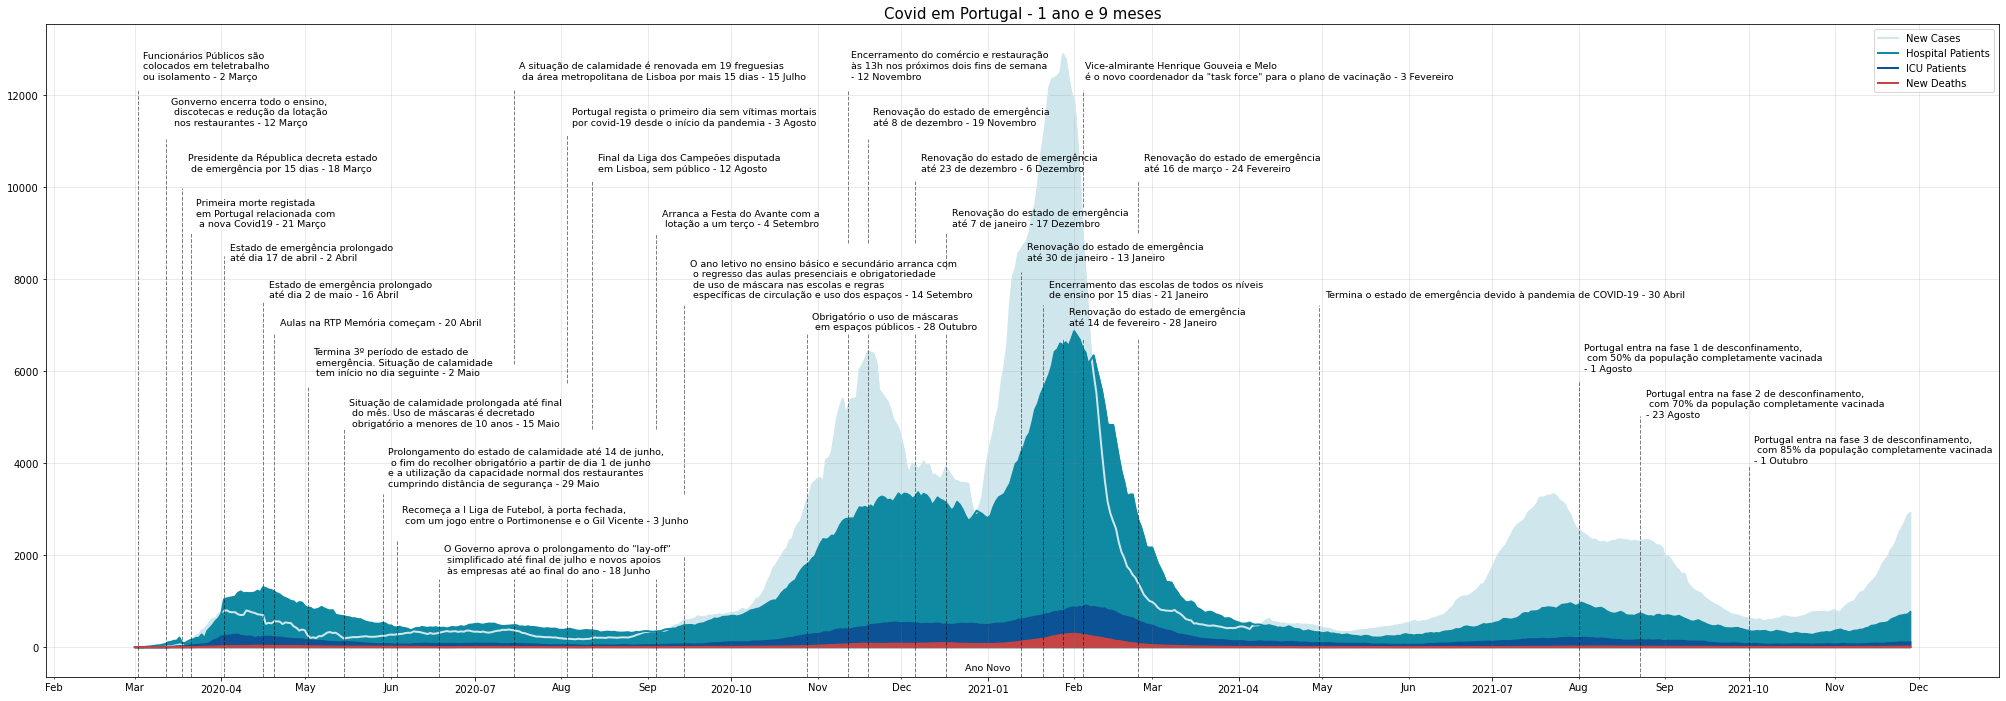

In [35]:
import datetime as dt
import matplotlib.dates as mdates

# Plot
plt.figure(figsize=(35,12), facecolor='white')
plt.plot('date', 'new_cases_smoothed', data=subset_1, color='#cfe7ec', linewidth=2, label='New Cases')
plt.plot('date', 'hosp_patients', data=subset_1, color='#1089a2', linewidth=2, label='Hospital Patients')
plt.plot('date', 'icu_patients', data=subset_1, color='#0b5394', linewidth=2, label='ICU Patients')
plt.plot('date', 'new_deaths_smoothed', data=subset_1, color='#c64444', linewidth=2, label='New Deaths')

# Coloring bellow the lines
plt.fill_between(subset_1['date'], subset_1['new_cases_smoothed'], color='#cfe7ec')
plt.fill_between(subset_1['date'], subset_1['hosp_patients'], color='#1089a2')
plt.fill_between(subset_1['date'], subset_1['icu_patients'], color='#0b5394')
plt.fill_between(subset_1['date'], subset_1['new_deaths_smoothed'], color='#c64444')

# Vertical lines
plt.axvline(dt.datetime(2020, 3, 2), ymin=0, ymax=0.9, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 3, 12), ymin=0, ymax=0.825, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 3, 18), ymin=0, ymax=0.75, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 3, 21), ymin=0, ymax=0.68, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 4, 2), ymin=0, ymax=0.645, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 4, 16), ymin=0, ymax=0.575, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 4, 20), ymin=0, ymax=0.525, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 5, 2), ymin=0, ymax=0.445, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 5, 15), ymin=0, ymax=0.38, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 5, 29), ymin=0, ymax=0.28, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 6, 3), ymin=0, ymax=0.21, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 6, 18), ymin=0, ymax=0.15, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 7, 15), ymin=0, ymax=0.15, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 7, 15), ymin=0.48, ymax=0.9, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 8, 3), ymin=0, ymax=0.15, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 8, 3), ymin=0.45, ymax=0.83, alpha=0.5, ls='--', color='black', linewidth=1) 
plt.axvline(dt.datetime(2020, 8, 12), ymin=0, ymax=0.15, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 8, 12), ymin=0.38, ymax=0.76, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 9, 4), ymin=0, ymax=0.15, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 9, 4), ymin=0.38, ymax=0.68, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 9, 14), ymin=0, ymax=0.185, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 9, 14), ymin=0.28, ymax=0.57, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 10, 28), ymin=0, ymax=0.525, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 11, 12), ymin=0, ymax=0.525, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 11, 12), ymin=0.665, ymax=0.9, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 11, 19), ymin=0, ymax=0.525, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 11, 19), ymin=0.665, ymax=0.825, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 12, 6), ymin=0, ymax=0.525, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 12, 6), ymin=0.665, ymax=0.76, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 12, 17), ymin=0, ymax=0.525, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2020, 12, 17), ymin=0.625, ymax=0.68, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2021, 1, 13), ymin=0, ymax=0.62, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2021, 1, 21), ymin=0, ymax=0.57, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2021, 1, 28), ymin=0, ymax=0.52, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2021, 2, 4), ymin=0, ymax=0.52, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2021, 2, 4), ymin=0.72, ymax=0.9, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2021, 2, 24), ymin=0, ymax=0.52, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2021, 2, 24), ymin=0.68, ymax=0.76, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2021, 4, 30), ymin=0, ymax=0.57, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2021, 8, 1), ymin=0, ymax=0.455, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2021, 8, 23), ymin=0, ymax=0.4, alpha=0.5, ls='--', color='black', linewidth=1)
plt.axvline(dt.datetime(2021, 10, 1), ymin=0, ymax=0.325, alpha=0.5, ls='--', color='black', linewidth=1)

# Text on each vertical line
plt.text(dt.datetime(2020, 3, 4), 12350, 'Funcionários Públicos são \ncolocados em teletrabalho \nou isolamento - 2 Março',
         fontsize=9.5, family='sans-serif', weight='ultralight')  # Texto colocado 2 dias à frente
plt.text(dt.datetime(2020, 3, 14), 11350, 'Gonverno encerra todo o ensino,\n discotecas e redução da lotação\n nos restaurantes - 12 Março',
         fontsize=9.5, family='sans-serif', weight='ultralight')
plt.text(dt.datetime(2020, 3, 20), 10350, 'Presidente da Républica decreta estado\n de emergência por 15 dias - 18 Março',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 3, 23), 9150, 'Primeira morte registada \nem Portugal relacionada com\n a nova Covid19 - 21 Março',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 4, 4), 8400, 'Estado de emergência prolongado\naté dia 17 de abril - 2 Abril',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 4, 18), 7600, 'Estado de emergência prolongado\naté dia 2 de maio - 16 Abril',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 4, 22), 7000, 'Aulas na RTP Memória começam - 20 Abril',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 5, 4), 5900, 'Termina 3º período de estado de\n emergência. Situação de calamidade\n tem início no dia seguinte - 2 Maio',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 5, 17), 4800, 'Situação de calamidade prolongada até final\n do mês. Uso de máscaras é decretado\n obrigatório a menores de 10 anos - 15 Maio',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 5, 31), 3500, 'Prolongamento do estado de calamidade até 14 de junho,\n o fim do recolher obrigatório a partir de dia 1 de junho\ne a utilização da capacidade normal dos restaurantes\ncumprindo distância de segurança - 29 Maio',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 6, 5), 2700, 'Recomeça a I Liga de Futebol, à porta fechada,\n com um jogo entre o Portimonense e o Gil Vicente - 3 Junho',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 6, 20), 1600, 'O Governo aprova o prolongamento do "lay-off"\n simplificado até final de julho e novos apoios\n às empresas até ao final do ano - 18 Junho',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 7, 17), 12350, 'A situação de calamidade é renovada em 19 freguesias\n da área metropolitana de Lisboa por mais 15 dias - 15 Julho',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 8, 5), 11350, 'Portugal regista o primeiro dia sem vítimas mortais\npor covid-19 desde o início da pandemia - 3 Agosto',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 8, 14), 10350, 'Final da Liga dos Campeões disputada\nem Lisboa, sem público - 12 Agosto',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 9, 6), 9150, 'Arranca a Festa do Avante com a\n lotação a um terço - 4 Setembro',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 9, 16), 7600, 'O ano letivo no ensino básico e secundário arranca com\n o regresso das aulas presenciais e obrigatoriedade\n de uso de máscara nas escolas e regras\n específicas de circulação e uso dos espaços - 14 Setembro',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 10, 30), 6900, 'Obrigatório o uso de máscaras\n em espaços públicos - 28 Outubro ',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 11, 13), 12350, 'Encerramento do comércio e restauração\nàs 13h nos próximos dois fins de semana\n- 12 Novembro ',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 11, 21), 11350, 'Renovação do estado de emergência\naté 8 de dezembro - 19 Novembro ',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 12, 8), 10350, 'Renovação do estado de emergência\naté 23 de dezembro - 6 Dezembro ',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 12, 19), 9150, 'Renovação do estado de emergência\naté 7 de janeiro - 17 Dezembro ',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2021, 1, 15), 8400, 'Renovação do estado de emergência\naté 30 de janeiro - 13 Janeiro ',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2021, 1, 23), 7600, 'Encerramento das escolas de todos os níveis\nde ensino por 15 dias - 21 Janeiro ',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2021, 1, 30), 7000, 'Renovação do estado de emergência\naté 14 de fevereiro - 28 Janeiro ',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2021, 2, 5), 12350, 'Vice-almirante Henrique Gouveia e Melo\né o novo coordenador da "task force" para o plano de vacinação - 3 Fevereiro ',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2021, 2, 26), 10350, 'Renovação do estado de emergência\naté 16 de março - 24 Fevereiro ',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2021, 5, 2), 7600, 'Termina o estado de emergência devido à pandemia de COVID-19 - 30 Abril ',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2021, 8, 3), 6000, 'Portugal entra na fase 1 de desconfinamento,\n com 50% da população completamente vacinada\n- 1 Agosto ',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2021, 8, 25), 5000, 'Portugal entra na fase 2 de desconfinamento,\n com 70% da população completamente vacinada\n- 23 Agosto ',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2021, 10, 3), 4000, 'Portugal entra na fase 3 de desconfinamento,\n com 85% da população completamente vacinada\n- 1 Outubro ',
         fontsize=9.5, family='sans-serif')
plt.text(dt.datetime(2020, 12, 24), -500, 'Ano Novo ',
         fontsize=9.5, family='sans-serif')



# Ticks per month
x = plt.gca().xaxis
months = mdates.MonthLocator(interval=1)
months_fmt = mdates.DateFormatter('%b')
x.set_minor_locator(months)
x.set_minor_formatter(months_fmt)
# Grid and title
plt.grid(True, which='both', color='grey', alpha=0.2)
plt.title('Covid em Portugal - 1 ano e 9 meses', fontsize=15)

plt.legend()
plt.show()

In [36]:
subset_2 = pt_data[['date', 'people_vaccinated', 'people_fully_vaccinated', 'population']]
subset_2

,date,people_vaccinated,people_fully_vaccinated,population
100881,2020-03-01,0,0,10167923
100882,2020-03-02,0,0,10167923
100883,2020-03-03,0,0,10167923
100884,2020-03-04,0,0,10167923
100885,2020-03-05,0,0,10167923
...,...,...,...,...
101514,2021-11-24,9030756,8887758,10167923
101515,2021-11-25,9030756,8887758,10167923
101516,2021-11-26,9030756,8887758,10167923
101517,2021-11-27,9030756,8887758,10167923


In [37]:
# Get percentages of people vaccinated and fully vaccinated to plot

n = 0
vac = []
for i in subset_2['people_vaccinated']:
    n = (i / 10167923) * 100
    vac.append(int(n))

b = 0   
fully_vac = []
for i in subset_2['people_fully_vaccinated']:
    b = (i / 10167923) * 100
    fully_vac.append(int(b)) 

print(len(subset_2))
print(len(vac))
print(len(fully_vac))

subset_2['%_vaccinated'] = vac
subset_2['%_fully_vaccinated'] = fully_vac
subset_2

638
638
638


C:\Users\JCALHE~1\AppData\Local\Temp/ipykernel_9116/1772936300.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_2['%_vaccinated'] = vac
C:\Users\JCALHE~1\AppData\Local\Temp/ipykernel_9116/1772936300.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_2['%_fully_vaccinated'] = fully_vac


,date,people_vaccinated,people_fully_vaccinated,population,%_vaccinated,%_fully_vaccinated
100881,2020-03-01,0,0,10167923,0,0
100882,2020-03-02,0,0,10167923,0,0
100883,2020-03-03,0,0,10167923,0,0
100884,2020-03-04,0,0,10167923,0,0
100885,2020-03-05,0,0,10167923,0,0
...,...,...,...,...,...,...
101514,2021-11-24,9030756,8887758,10167923,88,87
101515,2021-11-25,9030756,8887758,10167923,88,87
101516,2021-11-26,9030756,8887758,10167923,88,87
101517,2021-11-27,9030756,8887758,10167923,88,87


In [38]:
# Filter the percentage columns

percent_vacs = pd.concat([subset_2['date'], subset_2['%_vaccinated'], subset_2['%_fully_vaccinated']], axis=1)
percent_vacs.reset_index(inplace=True)
percent_vacs.set_index(percent_vacs['date'], inplace=True)
percent_vacs.drop(columns=['date', 'index'], inplace=True)
percent_vacs

,%_vaccinated,%_fully_vaccinated
date,,
2020-03-01,0,0
2020-03-02,0,0
2020-03-03,0,0
2020-03-04,0,0
2020-03-05,0,0
...,...,...
2021-11-24,88,87
2021-11-25,88,87
2021-11-26,88,87


In [39]:
# Create temporary df, with a 1 year period, with percentages of vaccinations and dates to plot
labels = ['Novembro 2020', 'Dezembro 2020', 'Janeiro 2021', 'Fevereiro 2021', 'Março 2021', 'Abril 2021',
          'Maio 2021', 'Junho 2021', 'Julho 2021', 'Agosto 2021', 'Setembro 2021', 'Outubro 2021', 'Novembro 2021']

vac_bar = [percent_vacs.loc['2020-11-30']['%_vaccinated'],percent_vacs.loc['2020-12-31']['%_vaccinated'],
           percent_vacs.loc['2021-01-31']['%_vaccinated'],percent_vacs.loc['2021-02-28']['%_vaccinated'],
           percent_vacs.loc['2021-03-31']['%_vaccinated'],percent_vacs.loc['2021-04-30']['%_vaccinated'],
           percent_vacs.loc['2021-05-31']['%_vaccinated'],percent_vacs.loc['2021-06-30']['%_vaccinated'],
           percent_vacs.loc['2021-07-31']['%_vaccinated'],percent_vacs.loc['2021-08-31']['%_vaccinated'],
           percent_vacs.loc['2021-09-30']['%_vaccinated'],percent_vacs.loc['2021-10-31']['%_vaccinated'],
           percent_vacs.loc['2021-11-28']['%_vaccinated']]

fully_vac_bar = [percent_vacs.loc['2020-11-30']['%_fully_vaccinated'],percent_vacs.loc['2020-12-31']['%_fully_vaccinated'],
                 percent_vacs.loc['2021-01-31']['%_fully_vaccinated'],percent_vacs.loc['2021-02-28']['%_fully_vaccinated'],
                 percent_vacs.loc['2021-03-31']['%_fully_vaccinated'],percent_vacs.loc['2021-04-30']['%_fully_vaccinated'],
                 percent_vacs.loc['2021-05-31']['%_fully_vaccinated'],percent_vacs.loc['2021-06-30']['%_fully_vaccinated'],
                 percent_vacs.loc['2021-07-31']['%_fully_vaccinated'],percent_vacs.loc['2021-08-31']['%_fully_vaccinated'],
                 percent_vacs.loc['2021-09-30']['%_fully_vaccinated'],percent_vacs.loc['2021-10-31']['%_fully_vaccinated'],
                 percent_vacs.loc['2021-11-28']['%_fully_vaccinated']]

d = {'%_vaccinated': vac_bar, '%_fully_vaccinated': fully_vac_bar, 'dates': labels}
df = pd.DataFrame(data=d)
df

,%_vaccinated,%_fully_vaccinated,dates
0,0,0,Novembro 2020
1,0,0,Dezembro 2020
2,2,0,Janeiro 2021
3,6,2,Fevereiro 2021
4,12,5,Março 2021
5,24,8,Abril 2021
6,38,20,Maio 2021
7,53,34,Junho 2021
8,69,58,Julho 2021
9,85,75,Agosto 2021


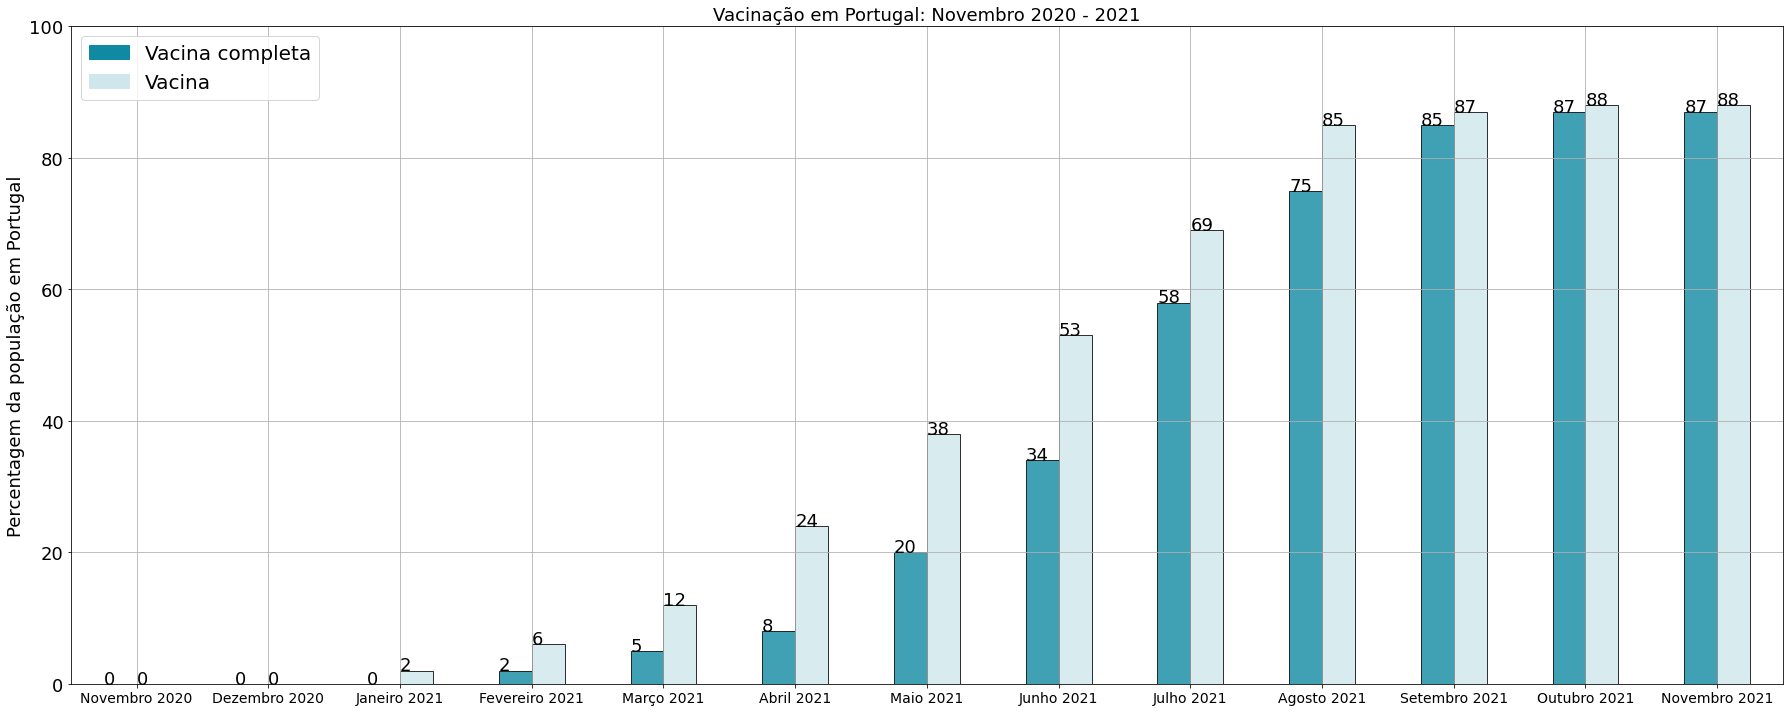

In [40]:
# Ploting
ax = df.plot(x='dates', y=['%_fully_vaccinated', '%_vaccinated'], kind='bar',figsize=(25,10),
            color=['#1089a2', '#cfe7ec'], edgecolor='black', lw=1, alpha=0.8)

# Labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()), fontsize=18)    
    
# Color legend
colors = {'Vacina completa':'#1089a2', 'Vacina':'#cfe7ec'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, fontsize=20, loc='upper left')

# Ticks, labels and title
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=18)
plt.xlabel('')
plt.ylabel('Percentagem da população em Portugal', fontsize=18)
plt.title('Vacinação em Portugal: Novembro 2020 - 2021', fontsize=18)

# Grid and Y limit
ax.grid()
ax.set_ylim([0, 100])

plt.tight_layout()
plt.show()

## European countries with +10 million in population

In [41]:
# Get only European countries
euro_data = all_data.where(all_data['continent'] == 'Europe')
# Drop countries with less than 10 million people
euro_data = euro_data[euro_data.population > 10000000]
# Drop Russia
euro_data = euro_data[euro_data.location != 'Russia']
euro_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
12342,BEL,Europe,Belgium,2020-02-04,1.0,1.0,NaN,NaN,NaN,NaN,...,25.1,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN
12343,BEL,Europe,Belgium,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,...,25.1,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN
12344,BEL,Europe,Belgium,2020-02-06,1.0,0.0,NaN,NaN,NaN,NaN,...,25.1,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN
12345,BEL,Europe,Belgium,2020-02-07,1.0,0.0,NaN,NaN,NaN,NaN,...,25.1,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN
12346,BEL,Europe,Belgium,2020-02-08,1.0,0.0,NaN,NaN,NaN,NaN,...,25.1,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130912,GBR,Europe,United Kingdom,2021-12-04,10479955.0,41574.0,44882.286,146001.0,127.0,119.143,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
130913,GBR,Europe,United Kingdom,2021-12-05,10523316.0,43361.0,45849.429,146055.0,54.0,119.571,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
130914,GBR,Europe,United Kingdom,2021-12-06,10575062.0,51746.0,47116.857,146101.0,46.0,121.143,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
130915,GBR,Europe,United Kingdom,2021-12-07,10620535.0,45473.0,47827.143,146281.0,180.0,123.857,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN


In [42]:
# Filter to just 4 columns
vac_df = euro_data[['location', 'date', 'people_vaccinated', 'people_fully_vaccinated']]
vac_df.set_index('date', inplace=True)
vac_df

,location,people_vaccinated,people_fully_vaccinated
date,,,
2020-02-04,Belgium,NaN,NaN
2020-02-05,Belgium,NaN,NaN
2020-02-06,Belgium,NaN,NaN
2020-02-07,Belgium,NaN,NaN
2020-02-08,Belgium,NaN,NaN
...,...,...,...
2021-12-04,United Kingdom,51096311.0,46530247.0
2021-12-05,United Kingdom,51118266.0,46557413.0
2021-12-06,United Kingdom,51138245.0,46582425.0


In [43]:
# Here I tried automating the cleaning process, taking in consideration that every country has different information
# and different numbers of NaN values per column.
# The goal is to replace NaNs with 0, ffil or bfill, depending on the situation and the specified columns and more.
# The process is described bellow.
# The objective is to end up with a DataFrame with the 12 countries and their percentages of peple vaccinated

# Get only European countries
euro_data = all_data.where(all_data['continent'] == 'Europe')

# Drop countries with less than 10 million people
euro_data = euro_data[euro_data.population > 10000000]

# Drop Russia - it appears in the list for some reason
euro_data = euro_data[euro_data.location != 'Russia']

# New DataFrame with specific columns and dates as index
vac_df = euro_data[['location', 'date', 'people_vaccinated', 'people_fully_vaccinated']]
vac_df.set_index('date', inplace=True)

# Create the countries list to work with. I discarted countries with a percentage of NaN values > 85%
countries_lst_all = vac_df['location'].unique().tolist()

countries_lst = []
for i in countries_lst_all:
    temp_df = vac_df[vac_df['location'] == i]
    total = len(temp_df)
    nan_vals = temp_df['people_vaccinated'].isna().sum()
    perc_missing = int((nan_vals * 100) / total)
    if perc_missing < 85:
        countries_lst.append(i)
    else:
        continue
        
# Creating different DataFrames based on country
n = 0
df_list = []
df_dictionary = {}
start_dates_lst = []
for i in range(len(countries_lst)):    
    if n > (len(countries_lst) - 1):
        break
    else:        
        # Get each country abreviation name for later use        
            # If the country name has a white space in it:
            # Get the first 2 letters from the first name AND the first letter from the second name
        if re.findall(r'(\w\s)+', countries_lst[n]):
            country_abv = (countries_lst[n][0:2] + countries_lst[n].split(' ')[1][0]).lower()
        else:
            country_abv = countries_lst[n][0:3].lower()
            
        # Create each DataFrame
        df = vac_df[vac_df['location'] == '{}'.format(countries_lst[n])]
       
        # Get the first rows with valid values in each column
        # Create a list with dates for when people started getting vaccinated (for later use)
        df_date_1 = df['people_vaccinated'].first_valid_index()
        df_date_2 = df['people_fully_vaccinated'].first_valid_index()
        start_dates_lst.append((countries_lst[n], df_date_1))
        
        # To have every DataFrame with the same length and same index (starting and ending in equal dates)
        # I will remove, from every DataFrame, rows before 2020-12-27
        df = df[~(df.index <= '2020-12-26')]
        
        # Now I will replace the NaN values from 2020-12-27 up until the first vallid value on each column of each DataFrame
        df.loc['2020-12-27': df_date_1]['people_vaccinated'].fillna(0, inplace=True)
        df.loc['2020-12-27': df_date_2]['people_fully_vaccinated'].fillna(0, inplace=True)
        
        # All the NaN values left in each DataFrame can be, I assume, replaced with method='ffill' since thoose same 
        # NaN values are in between valid values and/or sit on the last row of the DataFrame
        df.fillna(method='ffill', inplace=True)
        
        # Now to convert both columns from float type to int type
        cols = ['people_vaccinated', 'people_fully_vaccinated']
        df[cols] = df[cols].applymap(np.int64)
        
        # Rename columns with country abbreviation
        df.rename(columns={'people_vaccinated': country_abv + '_ppl_vac',
                           'people_fully_vaccinated': country_abv + '_ppl_fu_vac'}, inplace=True)
        
        # Drop location column
        df.drop(columns='location', inplace=True)
        
        # Check the length of every DataFrame created (should be 347)
        if len(df) != 347:
            print(f'{countries_lst[n]} length is incorrect.')    
            
        # Make sure all DataFrames start and end on the same date (should be 2020-12-27 and 2021-12-08)
        if df.index[0] != '2020-12-27' or df.index[-1] != '2021-12-08':
            print(f'{countries_lst[n]} has wrong dates!')
            
        # Join all DataFrames into one using concat and a created list containing all dfs
        df_list.append(df)
        joined_df = pd.concat(df_list, axis=1)   
        
        # Increment n    
        n += 1
        
# Create list with vaccination numbers (parcial and fully)       
vac_numbers = []
for i in joined_df.iloc[-1]:
    vac_numbers.append(i)
    
# Get the population of each country in a list (still only countries with + 10 million people)
pop_list = []
for c in countries_lst:
    expression = euro_data['population'][euro_data.location == c]
    for i in expression:
        if i in pop_list:
            continue
        else:
            pop_list.append(int(i))
            
# Now I will grab every pair, from each country,  from the vac_numbers list, multiply it by 100 and then divide it by
# each country total population in order to get percentages 

a0 = 0
a2 = 2
b0 = 0
b1 = 1
vac_lst = []
full_vac_lst = []

# I am getting values in pairs so I want to iterate over half the len of vac_numbers
for i in range(int(len(vac_numbers)/2)): 
    for val in range(len(pop_list)):
        if a2 > 24 or b1 > 12:
            break
        else:            
            p_vac = int((vac_numbers[a0:a2][0] * 100) / pop_list[b0:b1][0])       
            p_fully_vac = int((vac_numbers[a0:a2][1] * 100) / pop_list[b0:b1][0])

            vac_lst.append(p_vac)
            full_vac_lst.append(p_fully_vac)

            b0 += 1
            b1 += 1
            a0 += 2
            a2 += 2            
                     
# Create dictionary with each country and its values for people vaccinated and fully vaccinated in order to create 
# dataframe for the visualization        
percentage_dict = {}
m=0
for i in countries_lst:
    percentage_dict[i] = [vac_lst[m], full_vac_lst[m]]
    m += 1

perc_df = pd.DataFrame.from_dict(percentage_dict, orient='index', columns=['vac', 'fully_vac'])
perc_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,vac,fully_vac
Belgium,76,75
Czechia,62,60
France,77,70
Germany,71,68
Greece,69,64
Italy,78,73
Poland,55,54
Portugal,89,88
Romania,40,39
Spain,82,80


In [44]:
temp_v_df = perc_df.reset_index()
temp_v_df = temp_v_df.rename(columns={'index':'countries'})


# Vaccinations start dates
data = pd.DataFrame(start_dates_lst, columns=['country', 'date'])

# Now concat these 2 dfs to make visualization
v_df = pd.concat([temp_v_df, data], axis=1)
v_df.drop(columns='countries', inplace=True)
v_df = v_df.sort_values(by='date')
v_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 10
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vac        12 non-null     int64 
 1   fully_vac  12 non-null     int64 
 2   country    12 non-null     object
 3   date       12 non-null     object
dtypes: int64(2), object(2)
memory usage: 480.0+ bytes


['Czechia', 'France', 'Germany', 'Italy', 'Portugal', 'Romania', 'Belgium', 'Greece', 'Poland', 'Spain', 'United Kingdom', 'Ukraine']


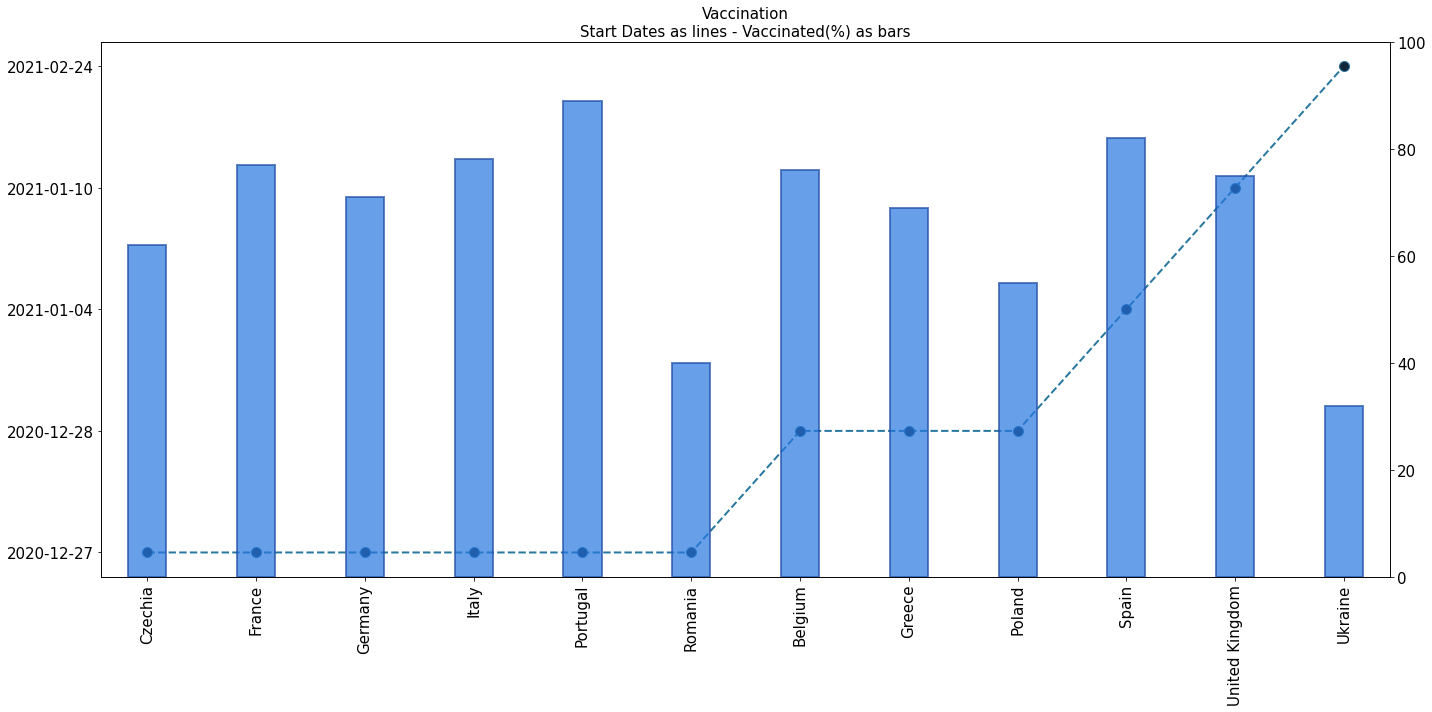

In [45]:
# Line plot and Bar plot overlaid 
countries = v_df['country'].tolist()
dates = v_df['date'].tolist()
print(countries)
width = 0.35

plt.figure(figsize=(20,10))

plt.plot(countries, dates, color='#2978a0', marker='o', lw=2, ls='--', mfc='#12263a', ms=10)
v_df['vac'].plot(kind='bar', width=width, secondary_y=True, alpha=0.7, fontsize=15, color='#2778e1', edgecolor='#2350a7', lw=2)

ax = plt.gca()
ax.set_xticklabels(countries, fontsize=15)

plt.title('Vaccination\nStart Dates as lines - Vaccinated(%) as bars', fontsize=15)

ax.set_ylim([0, 100])
plt.tight_layout()
plt.show()